In [1]:
import numpy as np #lib for array
import matplotlib.pyplot as plt #library use for plot purposes 
import pandas as pd #lib use to import dataset
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
# SCIKIT MODEL
from sklearn.datasets import make_regression 
from sklearn.model_selection import train_test_split, cross_val_score # import training and splitting
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor # multi layer perceptron/ deep learning
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [2]:
make_regression?


In [3]:
hdata= pd.read_csv ('/Users/ADEYEMI ADEDEJI/Desktop/Machine Learning/Data for project/house prediction/HppTrain.csv')

In [4]:
hdata.head()

,Id,YearBuilt,SalePrice
0,1,2003,208500
1,2,1976,181500
2,3,2001,223500
3,4,1915,140000
4,5,2000,250000


In [5]:
hdata.shape

(1460, 3)

In [6]:
hdata.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
SalePrice,1460.0,180921.195890,79442.502883,34900.0,129975.00,163000.0,214000.00,755000.0


In [7]:
hdata.columns

Index(['Id', 'YearBuilt', 'SalePrice'], dtype='object')

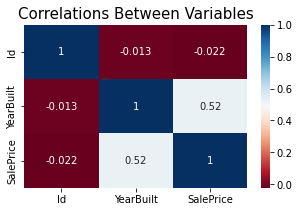

In [8]:
plt.figure(figsize=(5,3))
sns.heatmap(hdata.corr(), cmap= 'RdBu',annot= (True))
# sns.heatmap(hdata.corr(), annot =(True))
plt.title("Correlations Between Variables", size=15)
plt.show()

<Figure size 720x576 with 0 Axes>

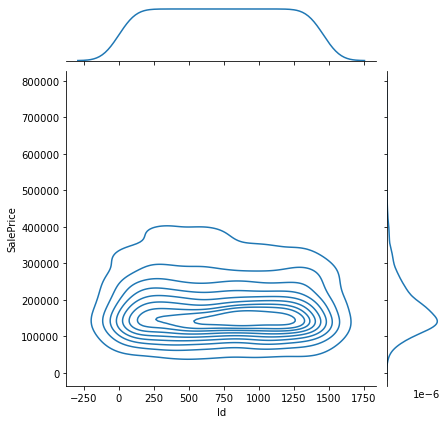

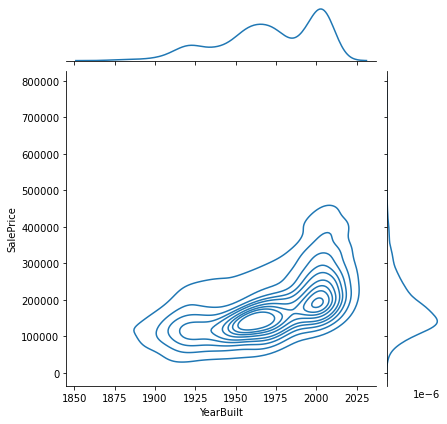

In [9]:
plt.figure(figsize=(10,8))
sns.jointplot(x=hdata["Id"], y=hdata["SalePrice"], kind="kde")
sns.jointplot(x=hdata["YearBuilt"], y=hdata["SalePrice"], kind="kde")

In [10]:
xtrain= hdata[('Id')]

xtrain.shape

In [11]:
ytrain= hdata[("SalePrice")]

In [12]:
xtrain.shape, ytrain.shape


((1460,), (1460,))

In [15]:
#linear regression 
# fwb = w*x + b # where w is the slope and b is the intercept 

how do we get w and b ?

In [16]:
make_regression?

In [38]:
bias=100 # bias is the intercept at x= 0
x, y,coef = make_regression(n_features=1, noise=10, bias=bias, random_state=42, coef=True)
b=bias
w= coef

In [39]:
w,b

(array(41.74110031), 100)

In [40]:
m= xtrain.shape[0]

In [41]:
def fwb():
   
    fwb = w*xtrain + b
    return fwb



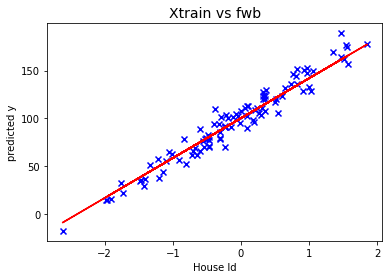

In [42]:
plt.title('Xtrain vs fwb',size= 14)
plt.xlabel('House Id')
plt.ylabel('predicted y')
plt.scatter(xtrain,ytrain, marker='x',color ='b')
plt.plot(xtrain,fwb(),color='r')

In [43]:
model= LinearRegression()

In [44]:
model.fit(xtrain,ytrain)

LinearRegression()

In [45]:
model.coef_ , model.intercept_

(array([44.43716999]), 101.16511532052698)

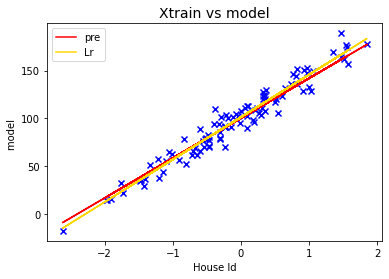

In [46]:
plt.title('Xtrain vs model',size= 14)
plt.xlabel('House Id')
plt.ylabel('model ')
plt.scatter(xtrain,ytrain, marker='x',color ='b')
plt.plot(xtrain,fwb(),color='r', label = 'pre')
plt.plot(xtrain,model.predict(xtrain),color='gold', label='Lr')
plt.legend()

In [47]:
# dataset.describe()
# dataset.columns
# sns.pairplot(dataset)
# sns.heatmap(dataset.corr()), annot =(True)
# bias= 100
# x,y, coef= dataset(n_features=1, bias = bias, random_state=42, coef= True)
# x.shape, y.shape
# plt.scatter(x,y)


In [80]:
class LinearRegre:
    #constructor 
    def __init__(self,lr=0.1):
        self.lr = lr 
#training function i.e fit 
    def fit (self, x, y):
        self._x = x
        self._y = y.reshape (-1, 1) # do calculations, else it will give error due to some numpy shape 
        #need to figure out value of coef and intercept 
        #step 1 : pick these value at random 
        
        self.coef_= np.random.random()
        self.intercept_ = np.random.random()
        
        #gradient descent 
        errors = []
        
        for i in range (50):
            self.gradient_descent()
            errors.append(self.error())
        return errors 
    
    def gradient_descent(self):
        #change in coef and intercept 
        d_coef, d_intercept = self.gradient()
        self.coef_ -= d_coef * self.lr
        self.intercept_ -= d_intercept * self.lr 
        
    def gradient (self ):
        yh= self. predict (self._x) # from predict function 
        
        d_coef = (( yh - self._y) * self._x).mean()
        
        d_intercept = (yh- self._y).mean()
        
        return d_coef, d_intercept 
    
    def predict (self, x):
        return x * self.coef_ + self.intercept_  
    
    def error (self):
        return ((self.predict (self._x) - self._y) ** 2 ).sum()
        
        
          


In [81]:
model = LinearRegre(lr= 0.1)


In [82]:
errors= model.fit(x,y)

In [83]:
model.coef_ , model.intercept_

(43.258680810890795, 100.29838558538864)

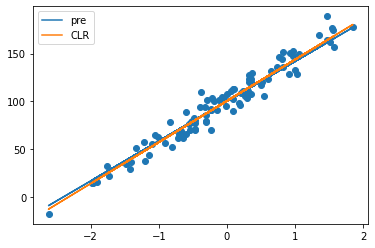

In [90]:
plt.scatter(x,y)
plt.plot(x,fwb(), label= "pre")
plt.plot(x, model.predict (x), label = "CLR")
plt.legend()

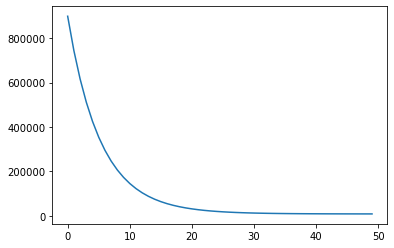

In [92]:
plt.plot(errors)

In [93]:
model.error()

7974.232000777201

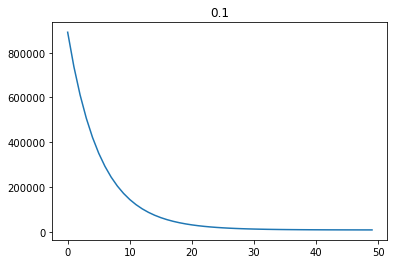

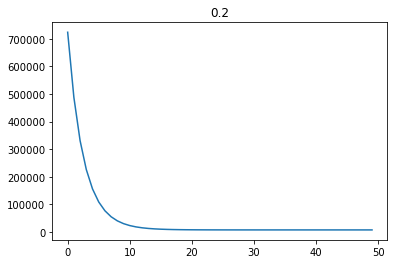

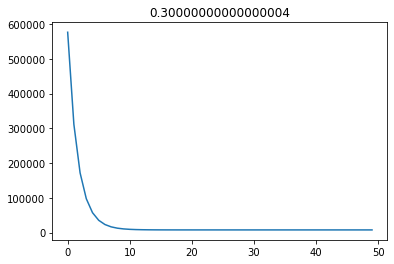

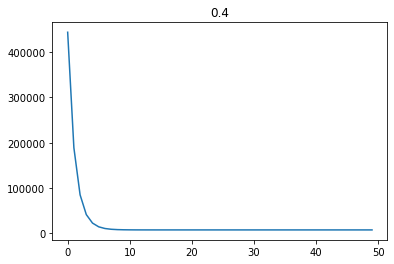

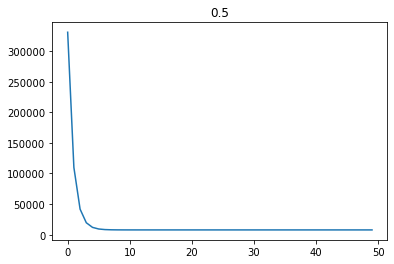

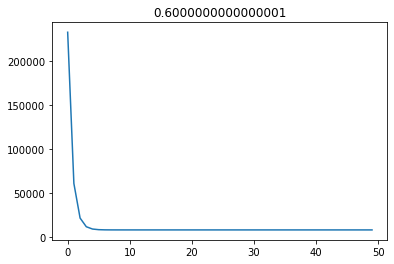

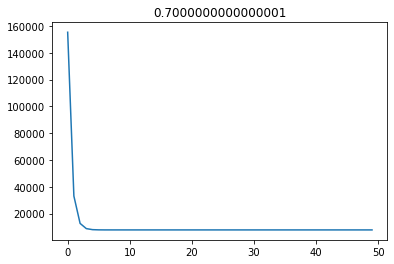

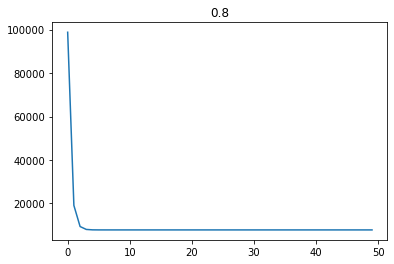

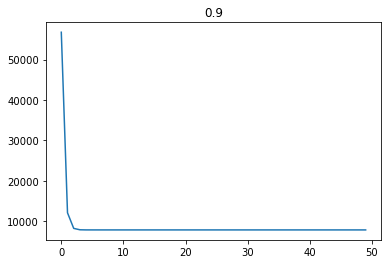

In [99]:
#testing learning rate 
for i in range (1, 10):
    model= LinearRegre(lr= .1 * i)
    errors = model.fit (x, y)
    
    plt.figure()
    plt.title(str(.1* i))
    plt.plot(errors)

## Housing problem 

In [100]:
from sklearn.datasets import load_boston
import pandas as pd 
from sklearn.model_selection import train_test_split 

In [102]:
X, y = load_boston (return_X_y= True)

In [103]:
boston = load_boston()

In [108]:
# print (boston.DESCR)

In [109]:
train_test_split?

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [113]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [114]:
model.predict(X_test[:1])

array([28.53469469])

In [115]:
X_test[:1]

array([[9.1780e-02, 0.0000e+00, 4.0500e+00, 0.0000e+00, 5.1000e-01,
        6.4160e+00, 8.4100e+01, 2.6463e+00, 5.0000e+00, 2.9600e+02,
        1.6600e+01, 3.9550e+02, 9.0400e+00]])

## Salary Dataset

In [159]:
dataset= pd.read_csv ('/Users/ADEYEMI ADEDEJI/Desktop/Machine Learning/Data for project/salary/Salary_Data.csv')

In [160]:
dataset.describe() 

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [161]:
dataset.head(n=10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


## CLEANING DATASET

In [163]:
#dataset.drop('Salary Estimate',axis= 1,inplace=True)

In [164]:
X= dataset.iloc [:, :-1]. values 

In [165]:
y=dataset.iloc[:, 1].values 

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [167]:
model= LinearRegression()

In [168]:
model.fit (X_train,y_train)

LinearRegression()

In [169]:
model.predict(X_test[:5])

array([115814.30756236,  71511.92534771, 102617.85328566,  75282.34085534,
        55487.65944028])

In [170]:
y_test[:5]

array([112635.,  67938., 113812.,  83088.,  64445.])

In [171]:
X_test[:5]

array([[9.6],
       [4.9],
       [8.2],
       [5.3],
       [3.2]])

In [172]:
model.score(X_test, y_test)

0.9553063138044949

In [174]:
yrs= int(input( 'how many years of experience do you have?:'))
sal= model.predict(np.array([yrs]).reshape(-1,1))
print("\nYour estimated salary is $", round (sal[0],3))

how many years of experience do you have?:4

Your estimated salary is $ 63028.49
